In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv('C:\\Users\\Wilson\\Desktop\\sample.csv', index_col=0)
df = df.dropna()
print(df.head())

dummy1 = pd.get_dummies(df['CNTRY_OF_RISK'], drop_first=True)
dummy2 = pd.get_dummies(df['INDUSTRY_SECTOR'], drop_first=True)

df_d = pd.concat([dummy1, dummy2, df['DUR_ADJ_MID']], axis=1)

print(df_d.head())

min_max_scaler = preprocessing.MinMaxScaler()
df_m = min_max_scaler.fit_transform(df_d)
print(df_m)

df_mt = df_m.T
print(df_mt)

pca = PCA(n_components=20)
pca.fit(df_mt)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.components_)


                   CNTRY_OF_RISK INDUSTRY_SECTOR  DUR_ADJ_MID
US56501RAC07 Corp@            CA       Financial     5.321080
XS1405757631 Corp@            CA       Financial     1.243338
SG7FH4000003 Corp@            SG       Financial     6.232079
SG76F2000003 Corp@            SG       Financial     3.531076
XS2075921887 Corp@            AE       Financial     4.350194
                    AU  BH  BR  CA  CH  CL  CN  CO  DE  ES  ...  \
US56501RAC07 Corp@   0   0   0   1   0   0   0   0   0   0  ...   
XS1405757631 Corp@   0   0   0   1   0   0   0   0   0   0  ...   
SG7FH4000003 Corp@   0   0   0   0   0   0   0   0   0   0  ...   
SG76F2000003 Corp@   0   0   0   0   0   0   0   0   0   0  ...   
XS2075921887 Corp@   0   0   0   0   0   0   0   0   0   0  ...   

                    Consumer, Cyclical  Consumer, Non-cyclical  Diversified  \
US56501RAC07 Corp@                   0                       0            0   
XS1405757631 Corp@                   0                       0     

<Container object of 1183 artists>

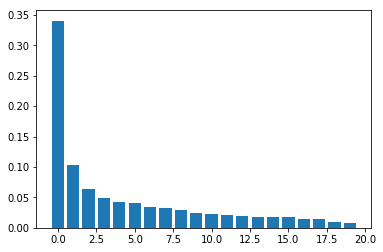

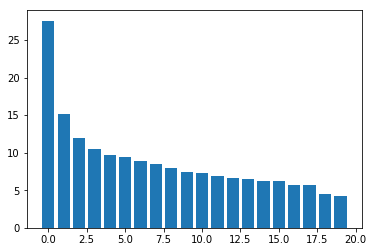

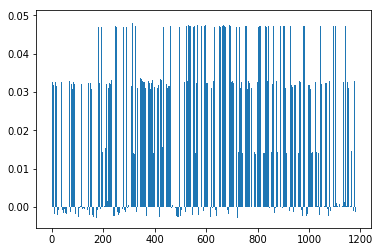

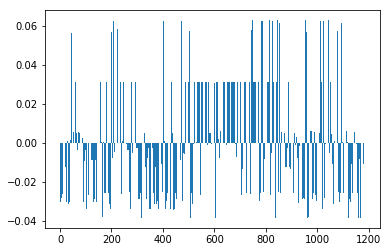

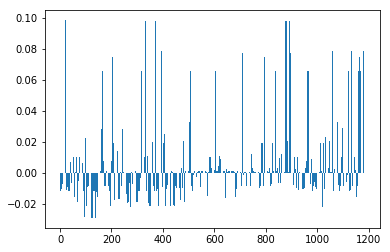

In [5]:
plt.figure()
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)

plt.figure()
plt.bar(range(len(pca.singular_values_)), pca.singular_values_)

plt.figure()
plt.bar(range(len(pca.components_[0])), pca.components_[0])

plt.figure()
plt.bar(range(len(pca.components_[1])), pca.components_[1])

plt.figure()
plt.bar(range(len(pca.components_[2])), pca.components_[2])


In [19]:
print(pca.components_.shape)

idx0 = abs(pca.components_[0]).argsort()[-200:][::-1]
print(idx0)
print(pca.components_[0][idx0])
print(df.index[idx0])
weight = pca.components_[0][idx0]
weight /= sum(weight)
print(weight)

idx1 = abs(pca.components_[1]).argsort()[-200:][::-1]
print(idx1)
print(pca.components_[1][idx1])
print(df.index[idx1])
weight = pca.components_[1][idx1]
weight /= sum(weight)
print(weight)

idx2 = abs(pca.components_[2]).argsort()[-200:][::-1]
print(idx2)
print(pca.components_[2][idx2])
print(df.index[idx2])
weight = pca.components_[2][idx2]
weight /= sum(weight)
print(weight)



(20, 1183)
[ 249  600  341  314  487  237  358  495  342   61  659  532  253  698
  655  670  488  498  211  598  694  157  293  668  236  531  685  758
  567  691  979 1103  753  496  202  636  570  579  397  539  561  612
  652  538  806  690  834  808 1053  862  952  901 1142 1095  666  248
  545  635  719  555  754  830  831  326  803  692  595  542  594  928
  608  811  674  523  664  817  757  658  499  695  895  900  228 1004
 1031  587  277  841  984  712 1016  245  673  665  631  639  697  755
  552  550  669  836  672  593  813  565  611  582 1070  843 1007  882
  181  781 1045  733  789 1036  679  289  540  890  462  433  905  536
  815  554  626  632  863  560  752  596  772  534  653  524 1000  583
  569   39  802  678  207  889  983  578   60  693  793  183  549  609
  566  812  634  638  978  640  735  762  717  461  771  252  184  929
  718  700  195  435  951  254  577 1151  551  633  544  648  651  676
 1051  805  533  930  281  650  934  182  730  432  292  247   82 

In [34]:
df.iloc[idx0]
for i, idx in enumerate(idx0):
    if df.iloc[idx]['CNTRY_OF_RISK']!='CN' or df.iloc[idx]['INDUSTRY_SECTOR']!='Financial':
        print(i)
        break
df.iloc[idx0[:30]]

CNTRY_OF_RISK INDUSTRY_SECTOR  DUR_ADJ_MID
XS0852986313 Corp@            CN       Financial    14.127700
XS2098650414 Corp@            CN       Financial     9.471175
XS2033262895 Corp@            CN       Financial     7.836816
XS2030348903 Corp@            CN       Financial     7.760823
XS1994698436 Corp@            CN       Financial     7.688932
XS1950126109 Corp@            CN       Financial     7.471126
XS1743535491 Corp@            CN       Financial     6.667106
XS1713193586 Corp@            CN       Financial     6.604028
XS2098539815 Corp@            CN       Financial     6.309252
XS1713316252 Corp@            CN       Financial     5.091943
XS2025575114 Corp@            CN       Financial     4.659627
XS2099272846 Corp@            CN       Financial     4.556102
XS2026425947 Corp@            CN       Financial     4.463546
XS2081524675 Corp@            CN       Financial     4.228902
XS2100444772 Corp@            CN       Financial     4.120207
XS1627599654 Corp@            CN       Financial     4.012761
XS1994698196 Corp@            CN       Financial     3.942033
XS1958532829 Corp@            CN       Financial     3.926629
XS2001168447 Corp@            CN       Financial     3.906326
XS2020061326 Corp@            CN       Financial     3.877515
XS2073593274 Corp@            CN       Financial     3.783583
HK0000490091 Corp@            CN       Financial     3.740580
XS1958533553 Corp@            CN       Financial     3.713312
XS2025848297 Corp@            CN       Financial     3.630300
XS1039273666 Corp@            CN       Financial     3.547724
XS1969792800 Corp@            CN       Financial     3.513950
XS1023280271 Corp@            CN       Financial     3.386202
XS2075937297 Corp@            CN       Financial     3.345780
XS1956169657 Corp@            CN       Financial     3.247385
XS1508493498 Corp@            CN       Financial     3.209311

In [27]:
df.iloc[idx1]
for i, idx in enumerate(idx1):
    if df.iloc[idx]['CNTRY_OF_RISK']!='CN' or df.iloc[idx]['INDUSTRY_SECTOR']!='Utilities':
        print(i)
        break
df.iloc[idx1[:30]]


19


CNTRY_OF_RISK INDUSTRY_SECTOR  DUR_ADJ_MID
USG8450LAF16 Corp@            CN       Utilities     0.229470
XS1262584532 Corp@            CN       Utilities     0.493925
USG3066LAA91 Corp@            CN       Utilities     1.197439
USG59606AA46 Corp@            CN       Utilities     1.202008
USG8850LAB65 Corp@            CN       Utilities     1.277419
XS1528227744 Corp@            CN       Utilities     1.754900
USG2113BAA64 Corp@            CN       Utilities     2.021027
XS1589745170 Corp@            CN       Utilities     2.039031
USG8669QAB61 Corp@            CN       Utilities     2.074041
USG2120QAB26 Corp@            CN       Utilities     2.152256
XS1612471117 Corp@            CN       Utilities     2.209530
XS2008741295 Corp@            CN       Utilities     2.234286
XS1624183197 Corp@            CN       Utilities     2.342091
XS1725552928 Corp@            CN       Utilities     2.691570
XS2016070190 Corp@            CN       Utilities     2.705694
USG8449VAB20 Corp@            CN       Utilities     3.093107
XS1308339420 Corp@            CN       Utilities     5.087408
USG8850LAC49 Corp@            CN       Utilities     5.686032
XS1528227827 Corp@            CN       Utilities     5.972791
USG8201NAE25 Corp@            CN          Energy     0.168863
USG8201JAB73 Corp@            CN          Energy     0.212940
US12634GAA13 Corp@            CN          Energy     0.232199
USG5320CAA65 Corp@            CN          Energy     0.254002
XS1267602214 Corp@            CN          Energy     0.464155
USG8201NAF99 Corp@            CN          Energy     0.577368
XS1894671418 Corp@            CN          Energy     0.694967
USG21895AB60 Corp@            CN          Energy     1.169284
USG8200TAB64 Corp@            CN          Energy     1.194932
USG8200TAG51 Corp@            CN          Energy     1.586873
XS1894675674 Corp@            CN          Energy     1.626516

In [28]:
df.iloc[idx2]
for i, idx in enumerate(idx2):
    if df.iloc[idx]['CNTRY_OF_RISK']!='US' or df.iloc[idx]['INDUSTRY_SECTOR']!='Consumer, Cyclical':
        print(i)
        break
df.iloc[idx2[:30]]

23


CNTRY_OF_RISK     INDUSTRY_SECTOR  DUR_ADJ_MID
USU76198AA52 Corp@            US  Consumer, Cyclical     7.225363
CA580135CD12 Corp@            US  Consumer, Cyclical     4.478865
AU3CB0261378 Corp@            US  Consumer, Cyclical     3.724027
US44891CAW38 Corp@            US  Consumer, Cyclical     3.090200
US37045XCL82 Corp@            US  Consumer, Cyclical     3.045520
USU65478BN50 Corp@            US  Consumer, Cyclical     2.890974
US552953CC35 Corp@            US  Consumer, Cyclical     2.786867
US035287AG69 Corp@            US  Consumer, Cyclical     2.760505
US44891CBC64 Corp@            US  Consumer, Cyclical     2.591058
USU65478BJ49 Corp@            US  Consumer, Cyclical     2.508346
US44891CAR43 Corp@            US  Consumer, Cyclical     2.465214
USU65478BE51 Corp@            US  Consumer, Cyclical     2.331909
XS1569850313 Corp@            US  Consumer, Cyclical     1.547397
USU65478AX42 Corp@            US  Consumer, Cyclical     1.547367
USU65478BP09 Corp@            US  Consumer, Cyclical     1.542365
US89233P5F99 Corp@            US  Consumer, Cyclical     1.533398
US345397VU41 Corp@            US  Consumer, Cyclical     1.415379
US44891CAH60 Corp@            US  Consumer, Cyclical     1.312329
US44891CAS26 Corp@            US  Consumer, Cyclical     1.049957
US44891CAD56 Corp@            US  Consumer, Cyclical     0.704930
US37045XBD75 Corp@            US  Consumer, Cyclical     0.688128
XS1423777561 Corp@            US  Consumer, Cyclical     0.304328
US44891CAV54 Corp@            US  Consumer, Cyclical     0.158280
US10373QAL41 Corp@            US              Energy     3.082365
US74733VAC46 Corp@            US              Energy     2.872351
US144577AH67 Corp@            US              Energy     2.786356
US75281ABA60 Corp@            US              Energy     2.686481
USG9007CAA83 Corp@            US              Energy     2.663932
US29278NAL73 Corp@            US              Energy     2.638449
US674215AE80 Corp@            US              Energy     2.563054

In [ ]:
dummy1 = pd.get_dummies(df['CNTRY_OF_RISK'])
dummy2 = pd.get_dummies(df['INDUSTRY_SECTOR'])

df_d = pd.concat([dummy1, dummy2, df['DUR_ADJ_MID']], axis=1)

print(df_d.head())

min_max_scaler = preprocessing.MinMaxScaler()
df_m = min_max_scaler.fit_transform(df_d)
print(df_m)

df_mt = df_m.T
print(df_mt)

pca = PCA(n_components=100)
pca.fit(df_mt)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print(pca.components_)


In [ ]:
print(pca.components_.shape)
idx = abs(pca.components_[0]).argsort()[-10:][::-1]
print(idx)
print(pca.components_[0][idx])
print(df.index[idx])
weight = pca.components_[0][idx]
weight /= sum(weight)
print(weight)